In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC052_35.png_a0c5f398-f772-4899-90ba-fe23ef8cbe38.png
/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC100_54.png_fcbb639e-2a3e-4d20-a8c3-7704e03088d6.png
/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC102_36.png_81aab898-ff11-4c16-8b24-7d204cd85b1a.png
/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC296_46.png_3aedfbce-d3da-47d1-b81f-d7e2a541df04.png
/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC296_46.png_fa29fd42-e628-4960-8a64-37ada9283e28.png
/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC349_58.png_2d7cc03d-2ee4-4019-be22-90d18561edf5.png
/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC096_54.png_60259889-1b7f-4168-9f99-4aa03ea1a8d9.png
/kaggle/input/autism-detect-new/autism_detect_new/non_asd/non_asd_original_TC111_37.png_43af2197-

In [2]:
base_path = "/kaggle/input/autism-detect-new/autism_detect_new"
categories = ["asd", "non_asd"]

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [3]:
df.head(10)

,image_path,label
0,/kaggle/input/autism-detect-new/autism_detect_...,asd
1,/kaggle/input/autism-detect-new/autism_detect_...,asd
2,/kaggle/input/autism-detect-new/autism_detect_...,asd
3,/kaggle/input/autism-detect-new/autism_detect_...,asd
4,/kaggle/input/autism-detect-new/autism_detect_...,asd
5,/kaggle/input/autism-detect-new/autism_detect_...,asd
6,/kaggle/input/autism-detect-new/autism_detect_...,asd
7,/kaggle/input/autism-detect-new/autism_detect_...,asd
8,/kaggle/input/autism-detect-new/autism_detect_...,asd
9,/kaggle/input/autism-detect-new/autism_detect_...,asd


In [5]:
df.shape

(3939, 2)

In [6]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [9]:
df['label'].unique()

array(['asd', 'non_asd'], dtype=object)

In [10]:
df['label'].value_counts()

label
asd        1971
non_asd    1968
Name: count, dtype: int64

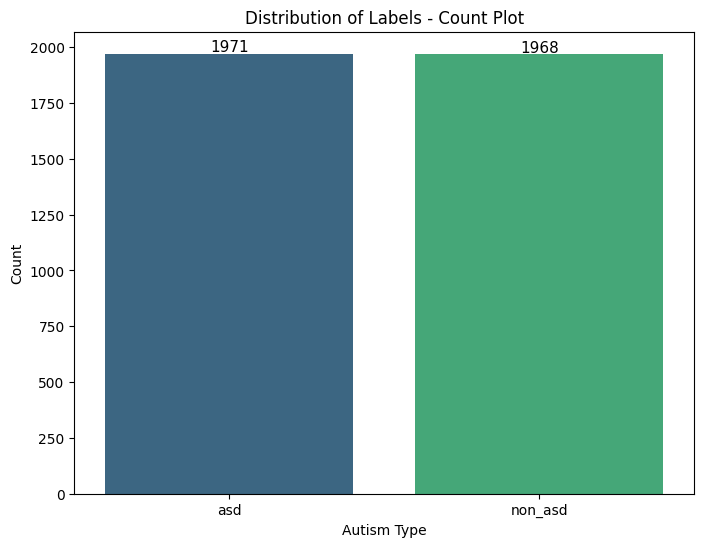

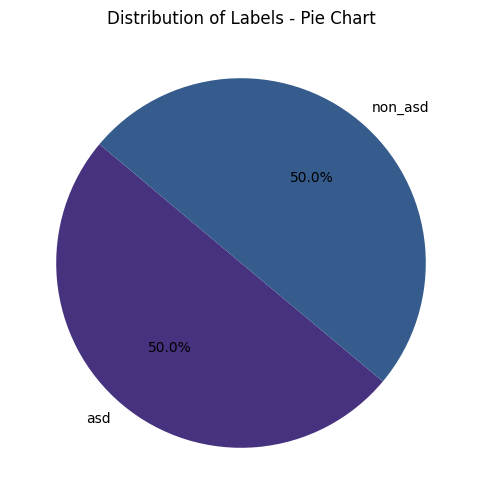

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Autism Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

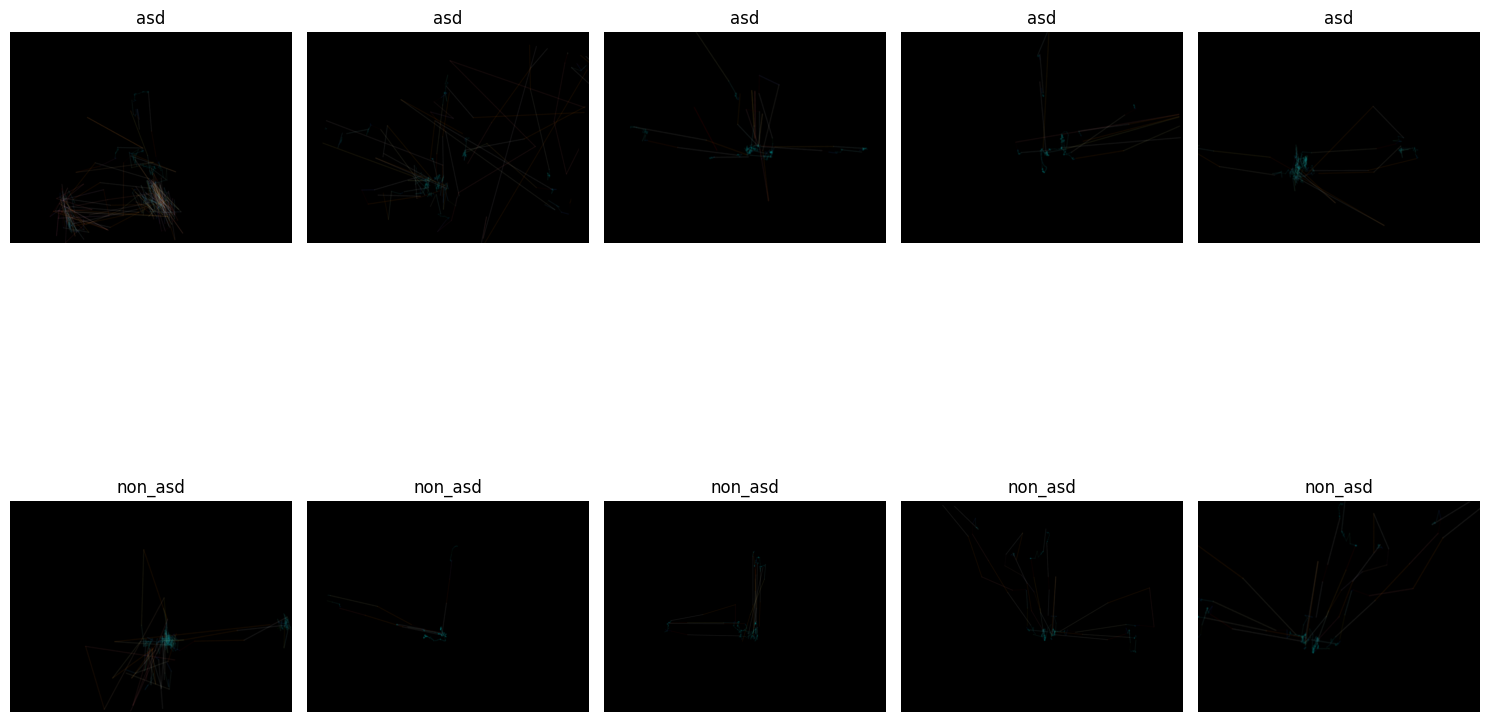

In [12]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [14]:
df = df[['image_path', 'category_encoded']]

In [15]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
#lets balance the data count of both the classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [17]:
#change the valye with the new resampled data
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [18]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())   #both will be equal now


Class distribution after oversampling:
category_encoded
0    1971
1    1971
Name: count, dtype: int64


In [19]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/autism-detect-new/autism_detect_...,0
1,/kaggle/input/autism-detect-new/autism_detect_...,0
2,/kaggle/input/autism-detect-new/autism_detect_...,0
3,/kaggle/input/autism-detect-new/autism_detect_...,0
4,/kaggle/input/autism-detect-new/autism_detect_...,0
...,...,...
3937,/kaggle/input/autism-detect-new/autism_detect_...,1
3938,/kaggle/input/autism-detect-new/autism_detect_...,1
3939,/kaggle/input/autism-detect-new/autism_detect_...,1
3940,/kaggle/input/autism-detect-new/autism_detect_...,1


In [20]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [21]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_path        3942 non-null   object
 1   category_encoded  3942 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 61.7+ KB


In [22]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [25]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  #will be categorical for multi class 
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 3153 validated image filenames belonging to 2 classes.
Found 394 validated image filenames belonging to 2 classes.
Found 395 validated image filenames belonging to 2 classes.


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
      
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_inception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1731051388.729773     404 service.cc:145] XLA service 0x7ce960004220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731051388.729842     404 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731051388.729847     404 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1731051401.843577     438 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1280 bytes spill stores, 1268 bytes spill loads



  2/198 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.5469 - loss: 0.9156   

I0000 00:00:1731051410.623767     404 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


197/198 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6716 - loss: 0.6848

I0000 00:00:1731051471.182792     518 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1280 bytes spill stores, 1268 bytes spill loads



198/198 ━━━━━━━━━━━━━━━━━━━━ 97s 331ms/step - accuracy: 0.6718 - loss: 0.6841 - val_accuracy: 0.7183 - val_loss: 0.7206
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 0.7801 - loss: 0.4513 - val_accuracy: 0.7487 - val_loss: 0.5581
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.8119 - loss: 0.4045 - val_accuracy: 0.7513 - val_loss: 0.5397
Epoch 4/5
 43/198 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.8056 - loss: 0.3861

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Porn'], yticklabels=['Normal', 'Porn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_xception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Porn'], yticklabels=['Normal', 'Porn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
inception_metrics = {
    'Precision': [0.74, 0.82],
    'Recall': [0.84, 0.71],
    'F1-Score': [0.79, 0.76]
}

xception_metrics = {
    'Precision': [0.84, 0.81],
    'Recall': [0.80, 0.85],
    'F1-Score': [0.82, 0.83]
}

labels = ['Class 0', 'Class 1']

bar_width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, inception_metrics['Precision'], width=bar_width, label='InceptionV3 Precision', alpha=0.7)
ax.bar(x - bar_width/2, inception_metrics['Recall'], width=bar_width, label='InceptionV3 Recall', alpha=0.7, bottom=inception_metrics['Precision'])
ax.bar(x - bar_width/2, inception_metrics['F1-Score'], width=bar_width, label='InceptionV3 F1-Score', alpha=0.7, bottom=np.array(inception_metrics['Precision']) + np.array(inception_metrics['Recall']))

ax.bar(x + bar_width/2, xception_metrics['Precision'], width=bar_width, label='Xception Precision', alpha=0.7)
ax.bar(x + bar_width/2, xception_metrics['Recall'], width=bar_width, label='Xception Recall', alpha=0.7, bottom=xception_metrics['Precision'])
ax.bar(x + bar_width/2, xception_metrics['F1-Score'], width=bar_width, label='Xception F1-Score', alpha=0.7, bottom=np.array(xception_metrics['Precision']) + np.array(xception_metrics['Recall']))

for i in range(len(labels)):
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] / 2, f"{inception_metrics['Precision'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] + inception_metrics['Recall'][i] / 2, f"{inception_metrics['Recall'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] + inception_metrics['Recall'][i] + inception_metrics['F1-Score'][i] / 2, f"{inception_metrics['F1-Score'][i]:.2f}", ha='center', va='center', color='white')
    
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] / 2, f"{xception_metrics['Precision'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] + xception_metrics['Recall'][i] / 2, f"{xception_metrics['Recall'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] + xception_metrics['Recall'][i] + xception_metrics['F1-Score'][i] / 2, f"{xception_metrics['F1-Score'][i]:.2f}", ha='center', va='center', color='white')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparative Performance of InceptionV3 and Xception with Differential Attention')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Copyright @ThinkAI - A Machine Learning Community (Thanks !!!)